Notebook for plotting all quantities vs KKPi to test cut impact on f1

In [1]:
import ROOT
from common_analysis_tools import *
import os

Welcome to JupyROOT 6.24/04


In [2]:
os.nice(18)
ROOT.EnableImplicitMT()

ROOT.gStyle.SetOptStat(0)

In [36]:
c = ROOT.TCanvas("c", "c", 800, 600)
c.Divide(2,1)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [4]:
beam_bin_filter = """
int get_beam_bin_index(double e_beam) {
        return static_cast<int>(e_beam-6.5) + 1;
}
"""

t_bin_filter = """
int get_t_bin_index(double t) {
    if (t <= 0.4) {
        return static_cast<int>(t/0.1)+1;
    }
    else if (t > 0.4 && t <= 0.9) {
        return static_cast<int>((t-0.4)/0.25)+5;
    }
    else if (t > 0.9 && t <= 1.9) {
        return static_cast<int>((t-0.9)/0.5)+7;
    }
    else {
        return -1;
    }
}
"""
ROOT.gInterpreter.Declare(t_bin_filter)
ROOT.gInterpreter.Declare(beam_bin_filter)

True

In [28]:
def build_recon_dataframe(channel):
    recon_file_and_tree_pipkmks_spring = get_flat_file_and_tree(f'{channel}', 'spring', 'data', filtered=False)
    recon_file_and_tree_pipkmks_fall = get_flat_file_and_tree(f'{channel}', 'fall', 'data', filtered=False)
    recon_file_and_tree_pipkmks_2017 = get_flat_file_and_tree(f'{channel}', '2017', 'data', filtered=False)

    df = ROOT.RDataFrame(recon_file_and_tree_pipkmks_spring[1], [recon_file_and_tree_pipkmks_spring[0], recon_file_and_tree_pipkmks_fall[0], recon_file_and_tree_pipkmks_2017[0]])
    return df

#uglyyyyyyyyy code sorry
def define_columns(df, channel):
    if channel == 'pipkmks':
        return df.Define('p_pt', 'sqrt(p_px_measured*p_px_measured + p_py_measured*p_py_measured)').Define('p_p', 'sqrt(p_px*p_px + p_py*p_py + p_pz*p_pz)').Define('ks_px', "pip2_px + pim_px").Define('ks_py', "pip2_py + pim_py").Define('ks_pz', "pip2_pz + pim_pz").Define('ks_E', "pip2_E + pim_E").Define('ks_m', "sqrt(ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz)").Define('ppip_px', 'pip1_px + p_px').Define('ppip_py', 'pip1_py + p_py').Define('ppip_pz', 'pip1_pz + p_pz').Define('ppip_E', 'pip1_E + p_E').Define('ppip_m', 'sqrt(ppip_E*ppip_E - ppip_px*ppip_px - ppip_py*ppip_py - ppip_pz*ppip_pz)').Define('ks_px_measured', "pip2_px_measured + pim_px_measured").Define('ks_py_measured', "pip2_py_measured + pim_py_measured").Define('ks_pz_measured', "pip2_pz_measured + pim_pz_measured").Define('ks_E_measured', "pip2_E_measured + pim_E_measured").Define('ks_m_measured', "sqrt(ks_E_measured*ks_E_measured - ks_px_measured*ks_px_measured - ks_py_measured*ks_py_measured - ks_pz_measured*ks_pz_measured)").Define('mxpx_ppipkmks', '-p_px_measured - pip1_px_measured - km_px_measured - ks_px_measured').Define('mxpy_ppipkmks', '-p_py_measured - pip1_py_measured - km_py_measured - ks_py_measured').Define('mxpz_ppipkmks', 'e_beam - p_pz_measured - pip1_pz_measured - km_pz_measured - ks_pz_measured').Define('mxe_ppipkmks', 'e_beam + 0.938272088 - p_E_measured - pip1_E_measured - km_E_measured - ks_E_measured').Define('mx2_ppipkmks', 'mxe_ppipkmks*mxe_ppipkmks - mxpx_ppipkmks*mxpx_ppipkmks - mxpy_ppipkmks*mxpy_ppipkmks - mxpz_ppipkmks*mxpz_ppipkmks').Define('missing_px', '-p_px - pip1_px - ks_px - km_px').Define('missing_py', '-p_py - pip1_py - ks_py - km_py').Define('missing_pz', 'e_beam - p_pz - pip1_pz - ks_pz - km_pz').Define('missing_E', 'e_beam + 0.938 - p_E - pip1_E - ks_E - km_E').Define('kmp_px', 'p_px + km_px').Define('kmp_py', 'p_py + km_py').Define('kmp_pz', 'p_pz + km_pz').Define('kmp_E', 'p_E + km_E').Define('kmp_m', 'sqrt(kmp_E*kmp_E - kmp_px*kmp_px - kmp_py*kmp_py - kmp_pz*kmp_pz)').Define('missing_m', 'sqrt(missing_E*missing_E - missing_px*missing_px - missing_py*missing_py - missing_pz*missing_pz)').Define('kspip_px', 'pip1_px + ks_px').Define('kspip_py', 'pip1_py + ks_py').Define('kspip_pz', 'pip1_pz + ks_pz').Define('kspip_E', 'pip1_E + ks_E').Define('kspip_m', 'sqrt(kspip_E*kspip_E - kspip_px*kspip_px - kspip_py*kspip_py - kspip_pz*kspip_pz)').Define('kmpip_px', 'pip1_px + km_px').Define('kmpip_py', 'pip1_py + km_py').Define('kmpip_pz', 'pip1_pz + km_pz').Define('kmpip_E', 'pip1_E + km_E').Define('kmpip_m', 'sqrt(kmpip_E*kmpip_E - kmpip_px*kmpip_px - kmpip_py*kmpip_py - kmpip_pz*kmpip_pz)').Define('pipkmks_px', 'pip1_px + km_px + ks_px').Define('pipkmks_py', 'pip1_py + km_py + ks_py').Define('pipkmks_pz', 'pip1_pz + km_pz + ks_pz').Define('pipkmks_E', 'pip1_E + km_E + ks_E').Define('pipkmks_m', 'sqrt(pipkmks_E*pipkmks_E - pipkmks_px*pipkmks_px - pipkmks_py*pipkmks_py - pipkmks_pz*pipkmks_pz)').Define('kmks_px', 'km_px + ks_px').Define('kmks_py', 'km_py + ks_py').Define('kmks_pz', 'km_pz + ks_pz').Define('kmks_E', 'km_E + ks_E').Define('kmks_m', 'sqrt(kmks_E*kmks_E - kmks_px*kmks_px - kmks_py*kmks_py - kmks_pz*kmks_pz)').Define('e_bin', 'int(e_beam-6.5) +1').Define('t_bin', 'get_t_bin_index(mand_t)').Define('ksp_px', 'p_px + ks_px').Define('ksp_py', 'p_py + ks_py').Define('ksp_pz', 'p_pz + ks_pz').Define('ksp_E', 'p_E + ks_E').Define('ksp_m', 'sqrt(ksp_E*ksp_E - ksp_px*ksp_px - ksp_py*ksp_py - ksp_pz*ksp_pz)')
    elif channel == 'pimkpks':
        return df.Define('p_pt', 'sqrt(p_px_measured*p_px_measured + p_py_measured*p_py_measured)').Define('p_p', 'sqrt(p_px*p_px + p_py*p_py + p_pz*p_pz)').Define('ks_px', "pim2_px + pip_px").Define('ks_py', "pim2_py + pip_py").Define('ks_pz', "pim2_pz + pip_pz").Define('ks_E', "pim2_E + pip_E").Define('ks_m', "sqrt(ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz)").Define('ks_px_measured', "pim2_px_measured + pip_px_measured").Define('ks_py_measured', "pim2_py_measured + pip_py_measured").Define('ks_pz_measured', "pim2_pz_measured + pip_pz_measured").Define('ks_E_measured', "pim2_E_measured + pip_E_measured").Define('ks_m_measured', "sqrt(ks_E_measured*ks_E_measured - ks_px_measured*ks_px_measured - ks_py_measured*ks_py_measured - ks_pz_measured*ks_pz_measured)").Define('mxpx_ppimkpks', '-p_px_measured - pim1_px_measured - kp_px_measured - ks_px_measured').Define('mxpy_ppimkpks', '-p_py_measured - pim1_py_measured - kp_py_measured - ks_py_measured').Define('mxpz_ppimkpks', 'e_beam - p_pz_measured - pim1_pz_measured - kp_pz_measured - ks_pz_measured').Define('mxe_ppimkpks', 'e_beam + 0.938272088 - p_E_measured - pim1_E_measured - kp_E_measured - ks_E_measured').Define('mx2_ppimkpks', 'mxe_ppimkpks*mxe_ppimkpks - mxpx_ppimkpks*mxpx_ppimkpks - mxpy_ppimkpks*mxpy_ppimkpks - mxpz_ppimkpks*mxpz_ppimkpks').Define('ppim_px', 'pim1_px + p_px').Define('ppim_py', 'pim1_py + p_py').Define('ppim_pz', 'pim1_pz + p_pz').Define('ppim_E', 'pim1_E + p_E').Define('ppim_m', 'sqrt(ppim_E*ppim_E - ppim_px*ppim_px - ppim_py*ppim_py - ppim_pz*ppim_pz)').Define('missing_px', '-p_px - pim1_px - ks_px - kp_px').Define('missing_py', '-p_py - pim1_py - ks_py - kp_py').Define('missing_pz', 'e_beam - p_pz - pim1_pz - ks_pz - kp_pz').Define('missing_E', 'e_beam + 0.938 - p_E - pim1_E - ks_E - kp_E').Define('missing_m', 'sqrt(missing_E*missing_E - missing_px*missing_px - missing_py*missing_py - missing_pz*missing_pz)').Define('kpp_px', 'p_px + kp_px').Define('kpp_py', 'p_py + kp_py').Define('kpp_pz', 'p_pz + kp_pz').Define('kpp_E', 'p_E + kp_E').Define('kpp_m', 'sqrt(kpp_E*kpp_E - kpp_px*kpp_px - kpp_py*kpp_py - kpp_pz*kpp_pz)').Define('ksp_px', 'p_px + ks_px').Define('ksp_py', 'p_py + ks_py').Define('ksp_pz', 'p_pz + ks_pz').Define('ksp_E', 'p_E + ks_E').Define('ksp_m', 'sqrt(ksp_E*ksp_E - ksp_px*ksp_px - ksp_py*ksp_py - ksp_pz*ksp_pz)').Define('kspim_px', 'pim1_px + ks_px').Define('kspim_py', 'pim1_py + ks_py').Define('kspim_pz', 'pim1_pz + ks_pz').Define('kspim_E', 'pim1_E + ks_E').Define('kspim_m', 'sqrt(kspim_E*kspim_E - kspim_px*kspim_px - kspim_py*kspim_py - kspim_pz*kspim_pz)').Define('kppim_px', 'pim1_px + kp_px').Define('kppim_py', 'pim1_py + kp_py').Define('kppim_pz', 'pim1_pz + kp_pz').Define('kppim_E', 'pim1_E + kp_E').Define('kppim_m', 'sqrt(kppim_E*kppim_E - kppim_px*kppim_px - kppim_py*kppim_py - kppim_pz*kppim_pz)').Define('pimkpks_px', 'pim1_px + kp_px + ks_px').Define('pimkpks_py', 'pim1_py + kp_py + ks_py').Define('pimkpks_pz', 'pim1_pz + kp_pz + ks_pz').Define('pimkpks_E', 'pim1_E + kp_E + ks_E').Define('pimkpks_px_measured', "pim1_px_measured + kp_px_measured + ks_px_measured").Define('pimkpks_py_measured', "pim1_py_measured + kp_py_measured + ks_py_measured").Define('pimkpks_pz_measured', "pim1_pz_measured + kp_pz_measured + ks_pz_measured").Define('pimkpks_pt', 'sqrt(pimkpks_px_measured*pimkpks_px_measured + pimkpks_py_measured*pimkpks_py_measured)').Define('pimkpks_p_pt_diff', 'pimkpks_pt - p_pt').Define('pimkpks_m', 'sqrt(pimkpks_E*pimkpks_E - pimkpks_px*pimkpks_px - pimkpks_py*pimkpks_py - pimkpks_pz*pimkpks_pz)').Define('kpks_px', 'kp_px + ks_px').Define('kpks_py', 'kp_py + ks_py').Define('kpks_pz', 'kp_pz + ks_pz').Define('kpks_E', 'kp_E + ks_E').Define('kpks_m', 'sqrt(kpks_E*kpks_E - kpks_px*kpks_px - kpks_py*kpks_py - kpks_pz*kpks_pz)').Define('e_bin', 'get_beam_bin_index(e_beam)').Define('t_bin', 'get_t_bin_index(mand_t)').Define('ppip_px', 'p_px + pip_px').Define('ppip_py', 'p_py + pip_py').Define('ppip_pz', 'p_pz + pip_pz').Define('ppip_E', 'p_E + pip_E').Define('ppip_m', 'sqrt(ppip_E*ppip_E - ppip_px*ppip_px - ppip_py*ppip_py - ppip_pz*ppip_pz)')
    


In [29]:
df_pipkmks = build_recon_dataframe('pipkmks')
df_pimkpks = build_recon_dataframe('pimkpks')

filepath: /work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_bestX2_2018_spring.root
filepath: /work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_bestX2_2018_fall.root
filepath: /work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_bestX2_2017.root
filepath: /work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_bestX2_2018_spring.root
filepath: /work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_bestX2_2018_fall.root
filepath: /work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_bestX2_2017.root


In [30]:
df_pipkmks = define_columns(df_pipkmks, 'pipkmks')
df_pimkpks = define_columns(df_pimkpks, 'pimkpks')

In [31]:
df_pipkmks = df_pipkmks.Filter(T_RANGE).Filter(BEAM_RANGE).Filter(P_P_CUT).Filter(MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(T_RANGE).Filter(BEAM_RANGE).Filter(P_P_CUT).Filter(MX2_PPIMKPKS_CUT)

In [11]:
hist_pipkmks_kspl = df_pipkmks.Histo2D(('pipkmks_kspl', 'pipkmks_kspl', 100, 1.0, 2.0, 100, 0.0, 10.0), 'pipkmks_m', 'pathlength_sig')
hist_pimkpks_kspl = df_pimkpks.Histo2D(('pimkpks_kspl', 'pimkpks_kspl', 100, 1.0, 2.0, 100, 0.0, 10.0), 'pimkpks_m', 'pathlength_sig')

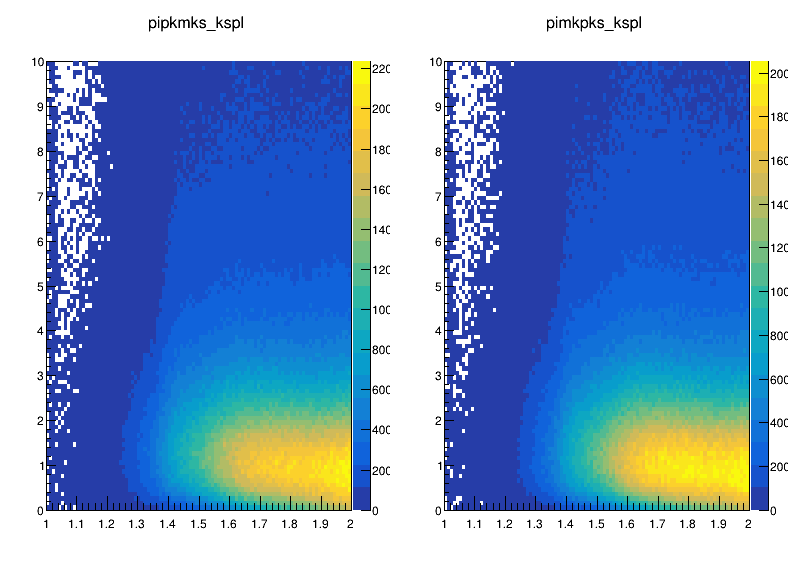

In [12]:
c.cd(1)
hist_pipkmks_kspl.Draw('colz')
c.cd(2)
hist_pimkpks_kspl.Draw('colz')
c.Update()
c.Draw()

In [32]:
df_pipkmks = df_pipkmks.Filter(KS_PATHLENGTH_CUT).Filter(KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(KS_PATHLENGTH_CUT).Filter(KS_MASS_CUT)

In [22]:
hist_pipkmks_kmp = df_pipkmks.Histo2D(('pipkmks_kmp', 'M(K^{-}p) vs M(#pi^{+}K^{-}K_{s})', 100, 1.0, 1.7, 100, 1.4, 3.0), 'pipkmks_m', 'kmp_m')
hist_pimkpks_kpp = df_pimkpks.Histo2D(('pimkpks_kpp', 'M(K^{+}p) vs M(#pi^{-}K^{+}K_{s})', 100, 1.0, 1.7, 100, 1.4, 3.0), 'pimkpks_m', 'kpp_m')

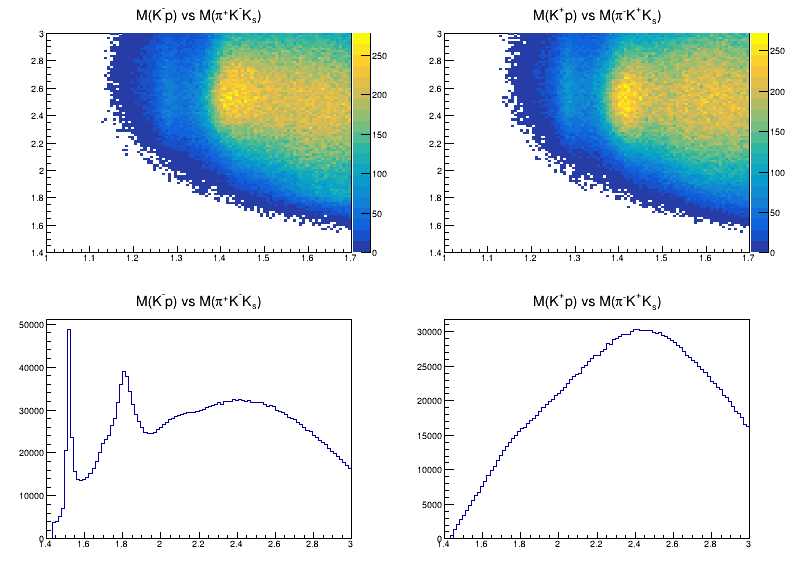

In [25]:
c.Divide(2,2)
c.cd(1)
hist_pipkmks_kmp.Draw('colz')
c.cd(2)
hist_pimkpks_kpp.Draw('colz')
c.cd(3)
hist_pipkmks_kmp.ProjectionY().Draw()
c.cd(4)
hist_pimkpks_kpp.ProjectionY().Draw()
c.Update()
c.Draw()

In [33]:
df_pipkmks = df_pipkmks.Filter(KMP_MASS_CUT)

In [35]:
hist_pipkmks_ksp = df_pipkmks.Histo2D(('pipkmks_ksp', 'M(K_{s}p) vs M(#pi^{+}K^{-}K_{s})', 100, 1.0, 1.7, 100, 1.0, 3.0), 'pipkmks_m', 'ksp_m')
hist_pimkpks_ksp = df_pimkpks.Histo2D(('pimkpks_ksp', 'M(K_{s}p) vs M(#pi^{-}K^{+}K_{s})', 100, 1.0, 1.7, 100, 1.0, 3.0), 'pimkpks_m', 'ksp_m')

In [ ]:
c.cd(1)